![banner](https://cdn.ciconiatravel.com/wp-content/uploads/2019/11/Mykonos-to-Athens-banner.jpg)

## In this notebook, I plan to show my skills doing basic exploratory data analysis on imported csv data. The [data](https://www.kaggle.com/jessemostipak/hotel-booking-demand) comes from user Jesse Mostipak on Kaggle. From the author:

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

---

## 1. First, let's import key libraries, read the csv, and quickly clean outstanding issues with the data
- Importing 'hotel_bookings.csv', assigning it to a dataframe, and checking info on the df:

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [61]:
df = pd.read_csv('hotel_bookings.csv') # import csv as df
pd.set_option('display.max_columns', None) # show all columns
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Removing 'na' values in columns where they are unacceptable:

- We see that, based on the df.info() call, that the **children**, **country**, **agent**, and **company** columns do not have as many non-null objects as the other columns. 
- We will delete rows in which **children** and **country** have n/a values since the values for those rows isn't known. We will keep the rows with null agent and company values - these are acceptable because not all booking are associated with an agent or company.

    - `df[df['col_name'].notna()]` filters out rows where the specified column has an 'na' value.

In [62]:
df = df[df['country'].notna()] 
df = df[df['children'].notna()] 
df.isna().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

- The n/a values in the children and country columns have been removed.
- Let's try `df.describe()` to find any potential errors or outliers.

In [63]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,102894.000000,6623.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,86.545532,189.624792,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,110.714259,132.124298,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- There is a large outlier on the upper end of the ADR distribution. Lets get rid of that.

In [64]:
df = df[df['adr'] < 1000]

## 2. Let's visualize frequency of bookings over time:

-  We need to first create a column showing the month and year of bookings' arrival in the format Month-Year.

In [65]:
df['arrival_date_year'] = df['arrival_date_year'].astype(str) #change year column to a string so it can be used in string addition
df['arrival'] = df['arrival_date_month'] + '-' + df['arrival_date_year'] #create arrival col in the format month-year
df['arrival']

0           July-2015
1           July-2015
2           July-2015
3           July-2015
4           July-2015
             ...     
119385    August-2017
119386    August-2017
119387    August-2017
119388    August-2017
119389    August-2017
Name: arrival, Length: 118897, dtype: object

- Next, let's use a seaborn countplot to display count of bookings per month.
- Initially, my x tick labels were way too close together. I found [this clever solution](https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn/38947307) from StackOverflow user Sascha to alleviate that issue.

Text(0, 0.5, 'Number of Reservations')

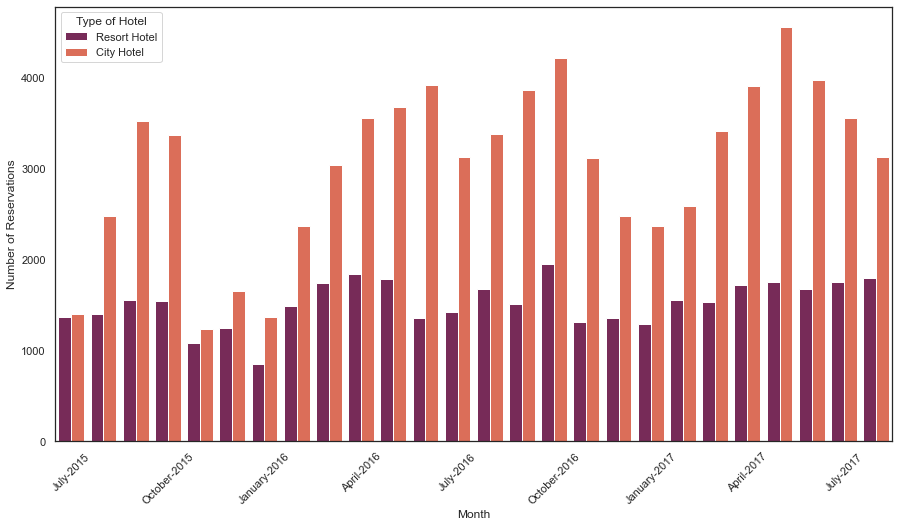

In [66]:
sns.set(palette='rocket',style='white')

fig, ax = plt.subplots(figsize=(15,8))
count_plot = sns.countplot(x='arrival',data=df,hue='hotel',palette='rocket')

for ind, label in enumerate(count_plot.get_xticklabels()):
    if ind % 3 == 0:  # if every third index, display the label
        label.set_visible(True)
        label.set_rotation(45)
    else:
        label.set_visible(False)

ax.legend(title = 'Type of Hotel')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Reservations')

#### Takeaways:
1. Bookings for both resort and city hotels fluxuate greatly with the time of year, the high season being the warmer months.
2. City-style hotels are about twice as popular as resort hotels. This is probably because there are a lot more city hotels than resorts, and that hotels in a city are generally more affordable than a resort located in a remote area.
3. Bookings per month seem to increase every year.

## 3. Next, let's calculate the length of the average booking by hotel type and time of year:
- First, we'll create a ['total nights'] column in our data frame that adds together ['stays_in_weekend_nights'] and ['stays_in_week_nights']:

In [67]:
df['total nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

- Creating a groupby object to group bookings by arrival month and hotel type. Then taking the mean of those groupings

In [68]:
avg_stay_data = df.groupby(['arrival','hotel'], sort = False).mean()
avg_stay_data.reset_index(inplace = True)                          

- Plotting booking month on the x axis and average length of stay on the y axis:

Text(0, 0.5, 'Average Length of Stay (Nights)')

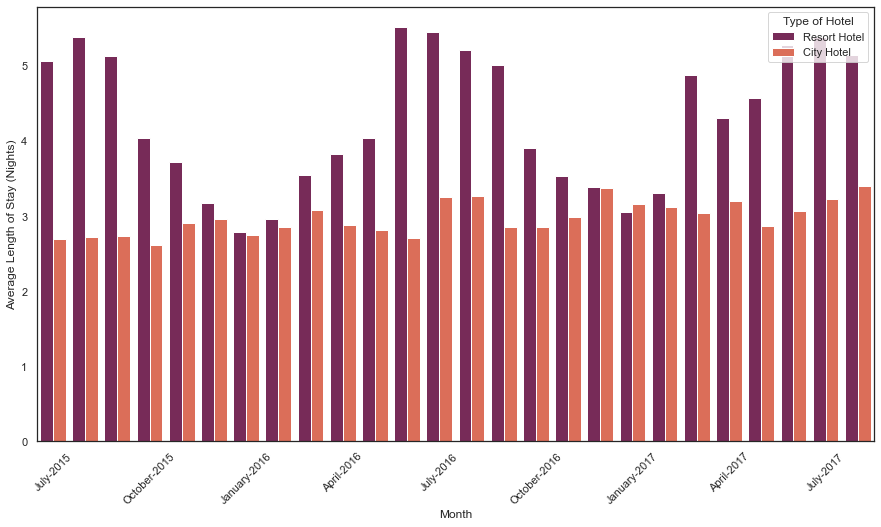

In [69]:
fig2, ax2 = plt.subplots(figsize=(15,8))

avg_stay_plot = sns.barplot(x = 'arrival', y = 'total nights',data = avg_stay_data, hue = 'hotel', palette='rocket')

for ind, label in enumerate(avg_stay_plot.get_xticklabels()): # showing every third x tick label
    if ind % 3 == 0: 
        label.set_visible(True)
        label.set_rotation(45)
    else:
        label.set_visible(False)
        
ax2.legend(title = 'Type of Hotel')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Length of Stay (Nights)')

#### Takeaways:
1. Bookings for resort-style hotels are much longer, on average, than city hotels. This is probably due to the fact that resorts require a long drive or flight to get to, and it's not worth the cost and time of travel unless you're staying for at least three or four nights.
2. Average length of stay for city hotels is basically the same year around at approximately three nights. It looks like this average has slightly increased over the years, but it is hard to tell with such a short time-period.
3. Average length of stay for resort hotels increases *drastically* in the warmer months, with the average length of stay increasing from just under three nights in January to over five nights in the summer.
4. There is only a single month in the 26 month sample where the average length of stay for city hotels is longer than average length of stay for resort hotels - January 2017.

## 4. A few more quick visualizations:
### a) Adults, children, and babies per booking:

Text(0, 0.5, '')

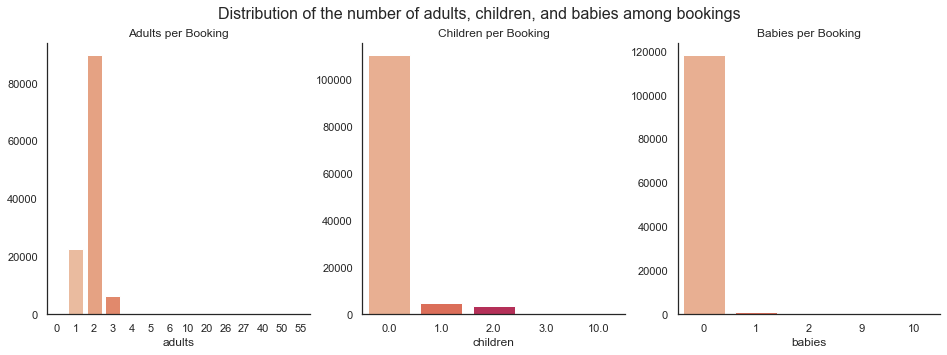

In [70]:
fig, axes = plt.subplots(1,3, figsize=(16,5)) # create a 1x3 subplot figure
fig.suptitle('Distribution of the number of adults, children, and babies among bookings', fontsize = 16)
sns.despine()
# Adults per booking
sns.countplot(ax = axes[0], x = 'adults', data = df, palette = 'rocket_r')
axes[0].set_title("Adults per Booking")
axes[0].set_ylabel('')
# Children per booking
sns.countplot(ax = axes[1], x = 'children', data = df, palette = 'rocket_r')
axes[1].set_title("Children per Booking")
axes[1].set_ylabel('')
# Babies per booking
sns.countplot(ax = axes[2], x = 'babies', data = df, palette = 'rocket_r')
axes[2].set_title("Babies per Booking")
axes[2].set_ylabel('')

- The median number of adults per booking is 2, with smaller groups of reservations containing one and three adults. Very few bookings zero or greater than 3 adults.
- Most bookings have zero children or babies, but there are outliers.

### b. Most commonly visited countries:
- I create a new dataframe called top_countries to display the top 15 booked countries. There may be a more consise way to do this with a countplot. I need to explore further.

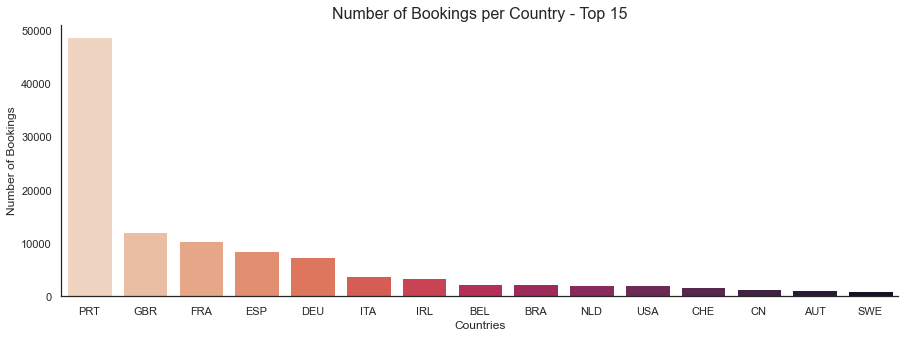

In [71]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Number of Bookings per Country - Top 15', fontsize = 16)
top_countries = pd.DataFrame(df['country'].value_counts().head(15)).reset_index()
top_countries
sns.barplot(x = 'index', y = 'country', data = top_countries, palette = 'rocket_r')
ax.set_xlabel('Countries', fontsize = 12)
ax.set_ylabel('Number of Bookings', fontsize = 12)
sns.despine()

### c. Average Daily Rate

Let's look into what is going on with ADR between different hotel types, room types, # of people per reservation, and distribution channel.

<AxesSubplot:xlabel='adr', ylabel='hotel'>

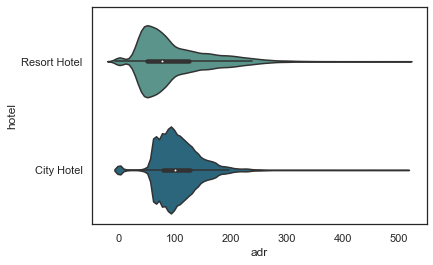

In [79]:
sns.violinplot(x='adr',y='hotel',data=df, palette='crest')

### d. Cancellations:
First, let's see whether a repeat customer is more or less likely to cancel on a booking: 

In [73]:
df.groupby('is_repeated_guest')['is_canceled'].mean()

is_repeated_guest
0    0.378831
1    0.145034
Name: is_canceled, dtype: float64

A repeat guest's booking is cancelled 14.5 % of the time while a first-time guest cancels the booking 37.9% of the time. As such, hotels should push to get repeat guests to stay at their hotel again since their rate of cancellation is lower, assuming a lower cancellation rate will increase revenue.

Next, let's see how often a person with previous bookings that weren't cancelled cancels on a booking.

In [74]:
df[df['previous_bookings_not_canceled'] > 0]['is_canceled'].value_counts()

0    3210
1     187
Name: is_canceled, dtype: int64

Of the 3620 bookings from an individual where the previous booking wasn't cancelled, the more recent booking was cancelled only about 5% of those returning, noncancelling guests. This is much lower than the 37% average cancellation rate. Hotels should focus on these guests with a proven track record of noncancellation if they want to reduce cancellation rates.

What percent of those without noncancelled previous bookings cancel their bookings?

In [75]:
df[df['previous_bookings_not_canceled'] == 0]['is_canceled'].value_counts()

0    71535
1    43965
Name: is_canceled, dtype: int64

Those without any previous noncancelled bookings cancel at a rate of 38% - slightly above the sample average!

## 5. What can hotels do to increase revenue?
### Two ways: Increased bookings or increased ADR
In the next section, we will create a linear regression model in an attempt to see which ways the other variables play into the adr, or average daily rate, for hotel bookings. We can then use these findings to try to determine how the hotels create their booking models.